## Crypto Arbitrage




In [2]:
import pandas as pd
from pathlib import Path
%matplotlib inline

###  Collecting the Data for Bitstamp and then displaying the first 5 rows.



In [3]:
bit_path = Path("/Users/bahaaamour/Desktop/Bitcoin_arbitrage/Resources/bitstamp.csv")

bitstamp = pd.read_csv(bit_path, index_col= "Timestamp", parse_dates= True, infer_datetime_format=True)

In [4]:
bitstamp.head()


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Collecting the Data for Coinbase and then displaying  the last 5 rows.

In [5]:
coinbase_path = Path("/Users/bahaaamour/Desktop/Bitcoin_arbitrage/Resources/coinbase.csv")

coinbase = pd.read_csv(coinbase_path, index_col= "Timestamp", parse_dates=True, infer_datetime_format=True)

In [6]:

coinbase.tail()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747
2018-03-31 23:58:00,6933.91,6938.00,6933.90,$6937.31,0.133413,925.356547,6936.048538
2018-03-31 23:59:00,6937.30,6937.30,6931.09,$6934.0,1.012720,7022.275088,6934.070316


### Replacing the `NaN` values with the Mean for Bitstamp DataFrame.

In [7]:
bitstamp.fillna(bitstamp.mean())

/var/folders/s4/jx0c78ws3l5dmmqzzk0y30dc0000gn/T/ipykernel_82340/2611545026.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  bitstamp.fillna(bitstamp.mean())


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6935.01,6939.07,6922.56,$6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,$6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,$6934.72,28.239049,195789.408220,6933.286106


### Step 2: Removing the `dollar ` value from Close Column in Bitstamp and then converting the data type from `str` to  `float`. We are also checking for duplicated values, and drop them if necessary.

In [8]:
bitstamp.loc[:,"Close"] = bitstamp.loc[:,"Close"].str.replace("$","")

/var/folders/s4/jx0c78ws3l5dmmqzzk0y30dc0000gn/T/ipykernel_82340/725682353.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  bitstamp.loc[:,"Close"] = bitstamp.loc[:,"Close"].str.replace("$","")


In [9]:
# checkinh if the $ sign was dropped.
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.0,1.069665,14582.660932,13632.923329


In [10]:
bitstamp.loc[:,"Close"] = bitstamp.loc[:,"Close"].astype(float)

In [11]:
bitstamp.loc[:,"Close"].dtypes

dtype('float64')

In [12]:
bitstamp.duplicated()

Timestamp
2018-01-01 00:00:00    False
2018-01-01 00:01:00    False
2018-01-01 00:02:00    False
2018-01-01 00:03:00    False
2018-01-01 00:04:00    False
                       ...  
2018-03-31 23:55:00    False
2018-03-31 23:56:00    False
2018-03-31 23:57:00    False
2018-03-31 23:58:00    False
2018-03-31 23:59:00    False
Length: 129540, dtype: bool

In [13]:
bitstamp.drop_duplicates()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.00,1.069665,14582.660932,13632.923329
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6935.01,6939.07,6922.56,6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,6934.72,28.239049,195789.408220,6933.286106


### Replacing the `NaN` values with the Mean for Bitstamp DataFrame.

In [14]:
coinbase.fillna(coinbase.mean())

/var/folders/s4/jx0c78ws3l5dmmqzzk0y30dc0000gn/T/ipykernel_82340/1514799335.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  coinbase.fillna(coinbase.mean())


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.085370,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.978010,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.196860,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.641820,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.269440,13574.719401
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747


# Repeating step 2 for coinbase DataFrame.

In [15]:
coinbase.loc[:,"Close"] = coinbase.loc[:,"Close"].str.replace("$","")

/var/folders/s4/jx0c78ws3l5dmmqzzk0y30dc0000gn/T/ipykernel_82340/1470485726.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  coinbase.loc[:,"Close"] = coinbase.loc[:,"Close"].str.replace("$","")


In [16]:
# Checking if the $ sign was dropped
coinbase.head() 

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.26944,13574.719401


In [17]:
coinbase.loc[:,"Close"] = coinbase.loc[:,"Close"].astype(float)

In [18]:
coinbase.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [19]:
coinbase.duplicated().all() #There is no duplicated values

False

In [20]:
coinbase.drop_duplicates()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.085370,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.978010,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.00,11.536360,156789.196860,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.641820,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.269440,13574.719401
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6945.20,6948.06,6930.00,6930.00,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,6933.91,0.776431,5382.532162,6932.405747


# Analyze the Data

In [21]:
#### this can be done better
bitstamp_sliced = bitstamp.iloc[:,3:4]


bitstamp_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13646.48
2018-01-01 00:01:00,13658.75
2018-01-01 00:02:00,13610.22
2018-01-01 00:03:00,13639.09
2018-01-01 00:04:00,13620.00


In [22]:

coinbase_sliced = coinbase.iloc[:,3:4]

coinbase_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13608.49
2018-01-01 00:01:00,13601.66
2018-01-01 00:02:00,13580.00
2018-01-01 00:03:00,13550.34
2018-01-01 00:04:00,13583.44


### Getting summary statistics and plotting the data 

In [23]:
bitstamp_sliced.describe()

,Close
count,129067.000000
mean,10459.842453
std,2315.976088
min,5944.000000
25%,8613.370000
50%,10145.950000
75%,11444.810000
max,17234.980000


In [24]:
coinbase_sliced.describe()

,Close
count,129322.000000
mean,10449.140958
std,2317.197419
min,5882.310000
25%,8609.230000
50%,10137.440000
75%,11397.237500
max,17177.990000


<AxesSubplot:title={'center':'Bitstamp Prices'}, xlabel='Timestamp'>

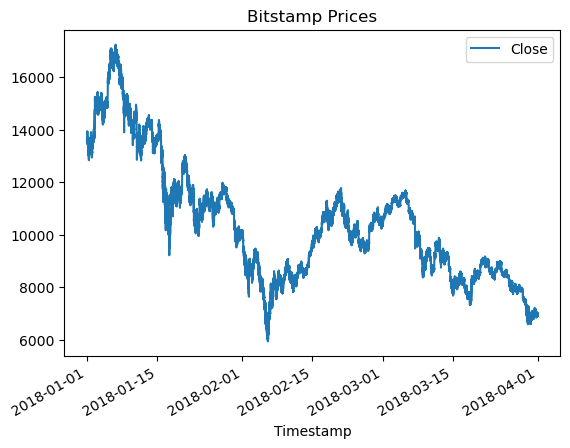

In [25]:
bitstamp_sliced.plot(title = "Bitstamp Prices")

<AxesSubplot:title={'center':'Coinbase Prices'}, xlabel='Timestamp'>

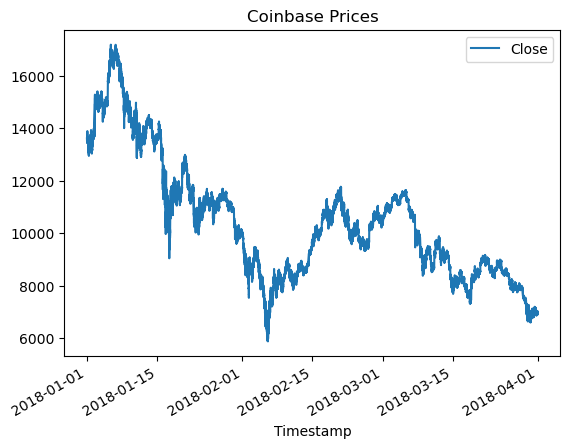

In [26]:
coinbase_sliced.plot(title = "Coinbase Prices")

### Overlaying the visualizations for the bitstamp and coinbase DataFrames in one plot over the full lenth of the dataset

<AxesSubplot:title={'center':'Bitstamp v. Coinbase'}, xlabel='Timestamp'>

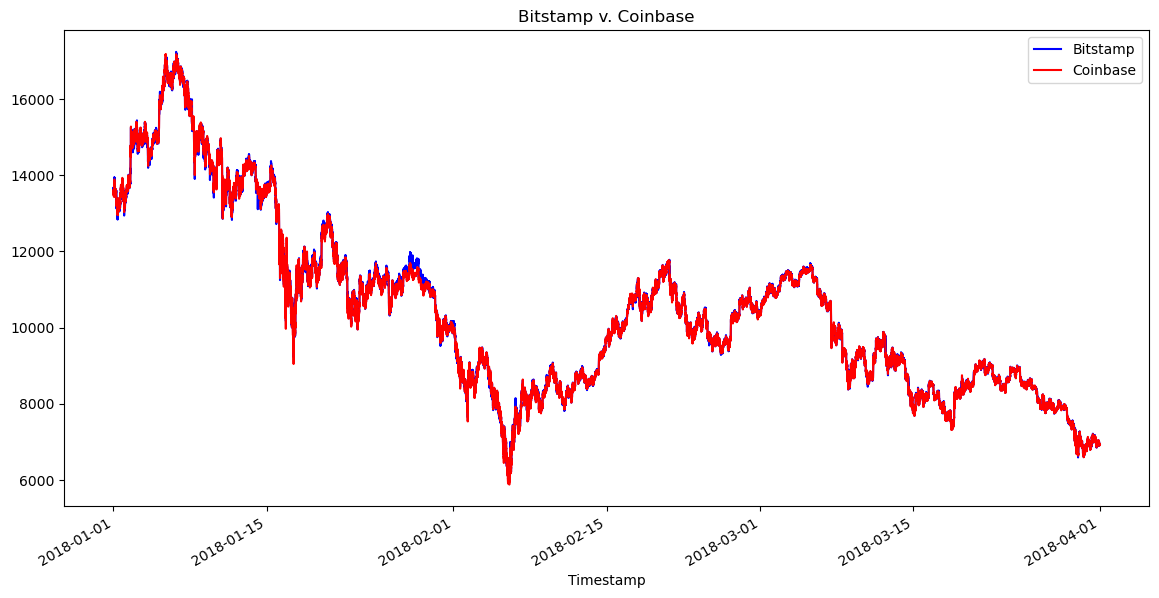

In [27]:
bitstamp["Close"].plot(legend= True ,figsize=(14,7),title="Bitstamp v. Coinbase",color= "Blue",label="Bitstamp")
coinbase["Close"].plot(legend= True ,figsize=(14,7),color= "red",label="Coinbase")

### Overlaying the visualizations for the bitstamp and coinbase DataFrames in one plot over the first one month period dataset

<AxesSubplot:title={'center':'Exchange Comparison(Earlier time period)'}, xlabel='Timestamp'>

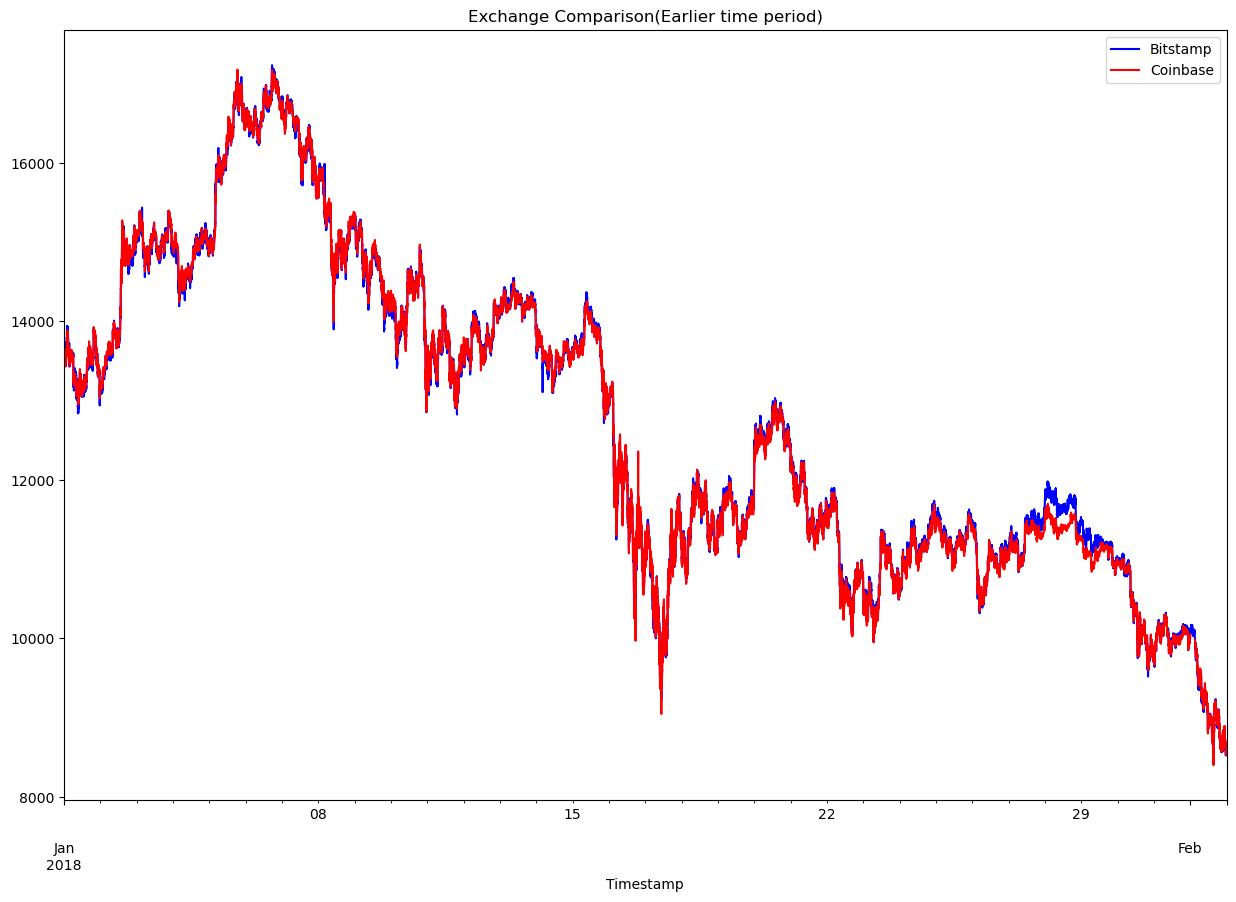

In [28]:
## find an answer for why it's not showing the dates
bitstamp["Close"].loc["2018-01-01":"2018-02-01"].plot(legend=True ,figsize=(15,10),title="Exchange Comparison(Earlier time period)",color= "Blue",label="Bitstamp")
coinbase["Close"].loc["2018-01-01":"2018-02-01"].plot(legend=True ,figsize=(15,10),color= "red",label="Coinbase")

### Overlaying the visualizations for the bitstamp and coinbase DataFrames in one plot over the last one month period dataset

<AxesSubplot:title={'center':'Exchange Comparison(Later time period)'}, xlabel='Timestamp'>

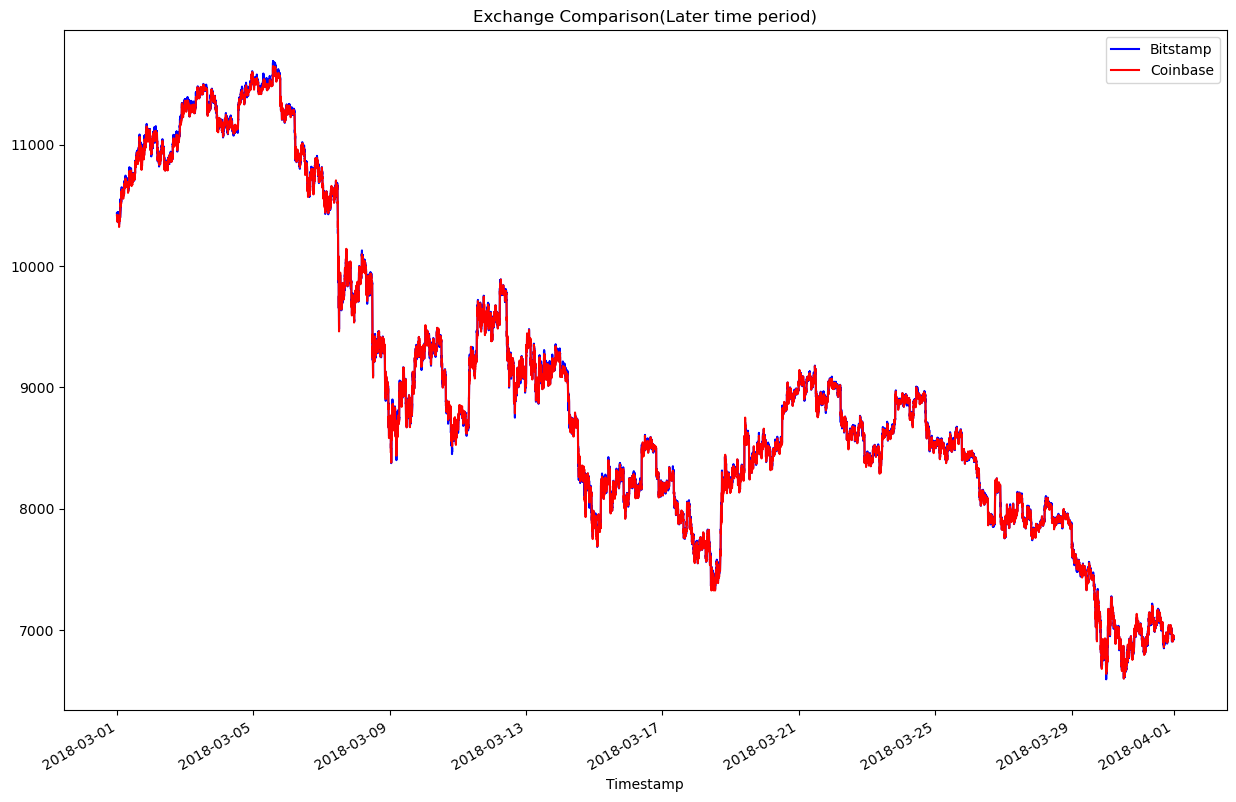

In [29]:
bitstamp["Close"].loc["2018-03-01":"2018-04-01"].plot(legend=True ,figsize=(15,10),title="Exchange Comparison(Later time period)",color= "Blue",label="Bitstamp")
coinbase["Close"].loc["2018-03-01":"2018-04-01"].plot(legend=True ,figsize=(15,10),color= "red",label="Coinbase")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** YOUR ANSWER HERE

# Step 3: Focus Your Analysis on Specific Dates


#### Overlaying plot for the two dataframes for the date January 16,2018

<AxesSubplot:title={'center':'Jan 16,2018'}, xlabel='Timestamp'>

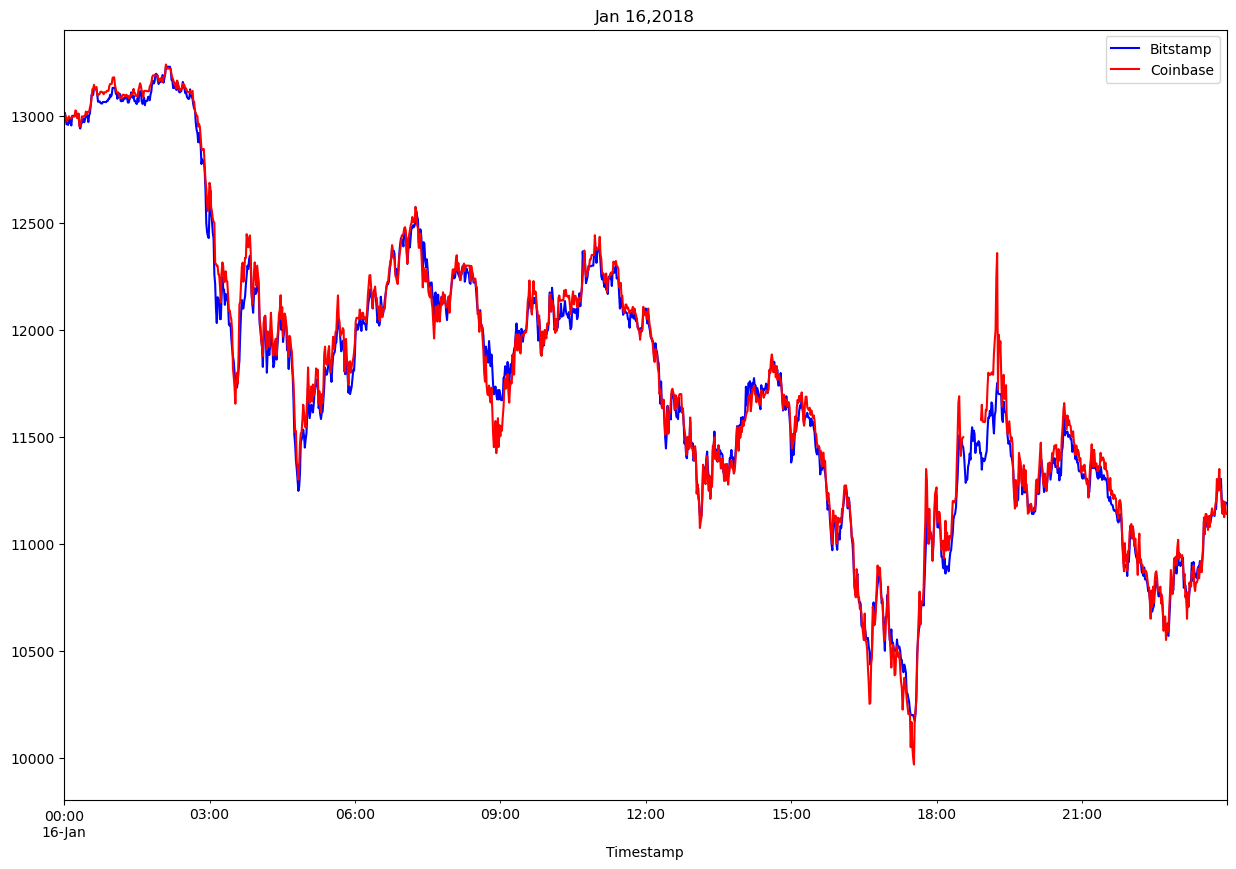

In [30]:
bitstamp["Close"].loc["2018-01-16"].plot(legend=True ,figsize=(15,10),title="Jan 16,2018",color= "Blue",label="Bitstamp")
coinbase["Close"].loc["2018-01-16"].plot(legend=True ,figsize=(15,10),color= "red",label="Coinbase")

#### Calculating the arbitrage spread for three dates and then visualizinf the spread in a box plot

In [40]:

arbitrage_spread_early = coinbase['Close'].loc["2018-01-16"]- bitstamp['Close'].loc["2018-01-16"]


arbitrage_spread_early.describe()

count    1419.000000
mean       23.212135
std        67.789186
min      -275.920000
25%        -8.330000
50%        22.280000
75%        52.355000
max       606.800000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread - Early Date'}>

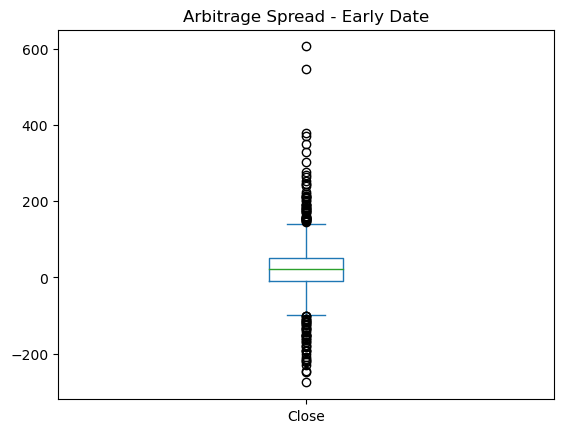

In [41]:
arbitrage_spread_early.plot(kind="box",title="Arbitrage Spread - Early Date")

<AxesSubplot:title={'center':'Feb 24,2018'}, xlabel='Timestamp'>

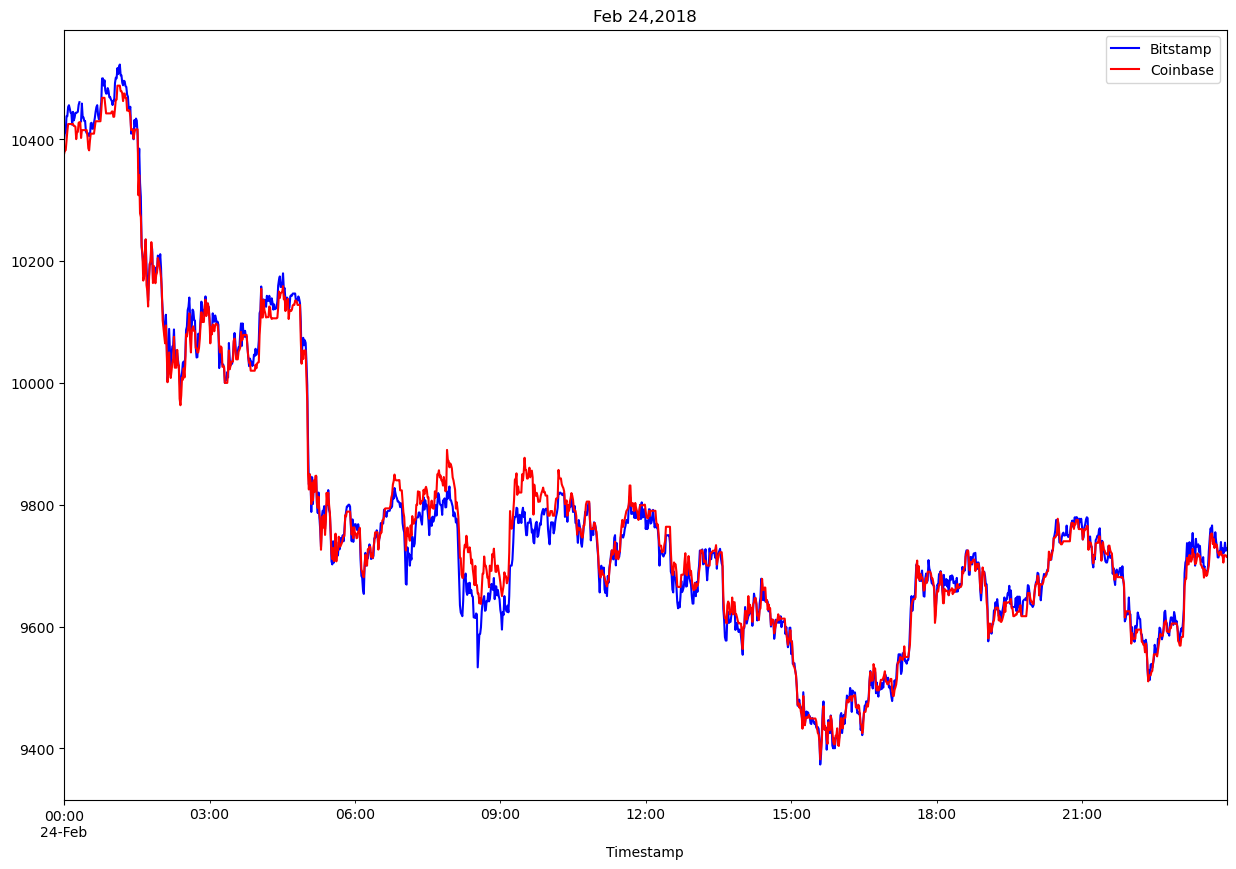

In [42]:
bitstamp["Close"].loc["2018-02-24"].plot(legend=True ,figsize=(15,10),title="Feb 24,2018",color= "Blue",label="Bitstamp")
coinbase["Close"].loc["2018-02-24"].plot(legend=True ,figsize=(15,10),color= "red",label="Coinbase")

In [48]:

arbitrage_spread_middle = coinbase["Close"].loc["2018-02-24"] - bitstamp["Close"].loc["2018-02-24"]

 
arbitrage_spread_middle.describe()

count    1437.000000
mean        3.396131
std        22.969472
min       -50.180000
25%       -10.590000
50%        -0.010000
75%        12.120000
max       121.320000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread - Middle Date'}>

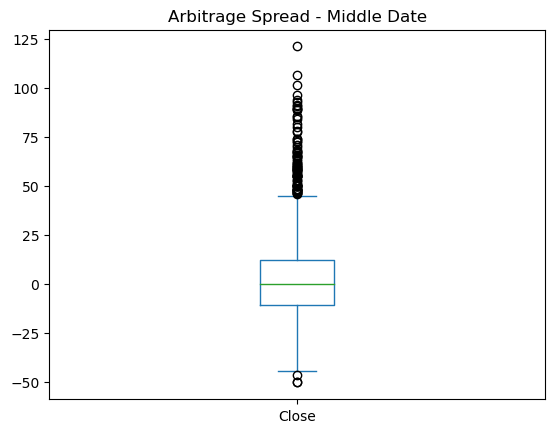

In [44]:
arbitrage_spread_middle.plot(kind="box",title='Arbitrage Spread - Middle Date')

<AxesSubplot:title={'center':'March 26,2018'}, xlabel='Timestamp'>

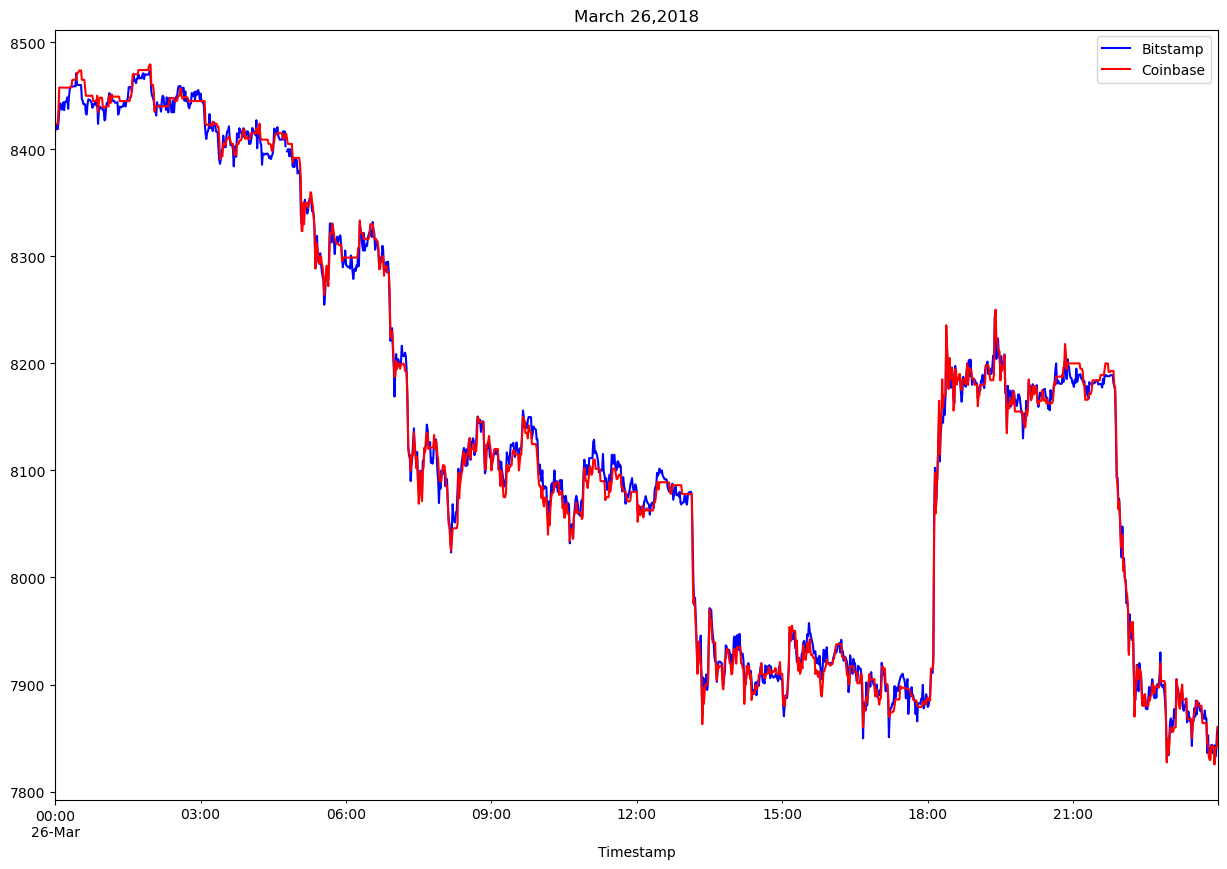

In [49]:

bitstamp["Close"].loc["2018-03-26"].plot(legend=True ,figsize=(15,10),title="March 26,2018",color= "Blue",label="Bitstamp")
coinbase["Close"].loc["2018-03-26"].plot(legend=True ,figsize=(15,10),color= "red",label="Coinbase")

In [50]:

arbitrage_spread_late =  coinbase["Close"].loc["2018-03-26"] - bitstamp["Close"].loc["2018-03-26"]

arbitrage_spread_late.describe()

count    1432.000000
mean       -0.722193
std         8.523060
min       -32.040000
25%        -6.812500
50%        -0.730000
75%         4.965000
max        35.070000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread - Late Date'}>

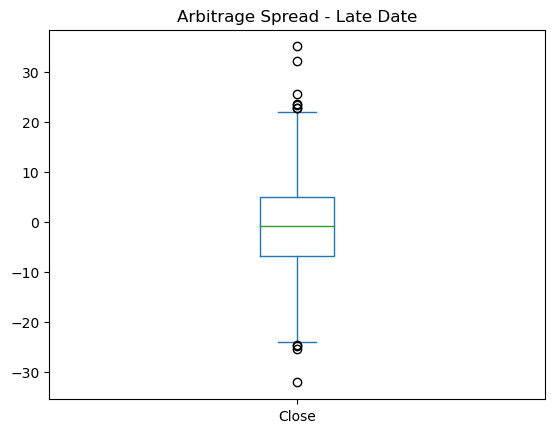

In [47]:
arbitrage_spread_late.plot(kind="box",title="Arbitrage Spread - Late Date")

# Step 4: Calculate the Arbitrage Profits



#### Measuring the arbitrage spread between the two exchanges for the three dates and then generating summary statistics.

In [57]:
# Early Date 
arbitrage_spread_early = coinbase['Close'].loc["2018-01-16"]- bitstamp['Close'].loc["2018-01-16"]

profitable_spread_early = arbitrage_spread_early[arbitrage_spread_early>0]

profitable_spread_early.describe()

# Middle Date
arbitrage_spread_middle = coinbase['Close'].loc["2018-02-24"]- bitstamp['Close'].loc["2018-02-24"]

profitable_spread_middle = arbitrage_spread_middle[arbitrage_spread_middle>0]

profitable_spread_middle.describe()

# Late Date
arbitrage_spread_late = coinbase['Close'].loc["2018-03-26"]- bitstamp['Close'].loc["2018-03-26"]

profitable_spread_late = arbitrage_spread_late[arbitrage_spread_late>0]

profitable_spread_late.describe()

count    651.000000
mean       6.689247
std        5.240159
min        0.010000
25%        2.835000
50%        5.230000
75%        9.195000
max       35.070000
Name: Close, dtype: float64

#### Calculating the spread returns for the three dates when the arbitrage spread is positive by the price of Bitcoin from Bitstamp.

In [58]:
#Early Date
spread_return_early= profitable_spread_early/bitstamp['Close'].loc['2018-01-16']
spread_return_early

#Middle Date 
spread_return_middle = profitable_spread_middle/bitstamp['Close'].loc['2018-02-24']
spread_return_middle

# Late Date
spread_return_late = profitable_spread_late/bitstamp['Close'].loc['2018-03-26']
spread_return_late


Timestamp
2018-03-26 00:00:00    0.000738
2018-03-26 00:01:00    0.000122
2018-03-26 00:02:00    0.000470
2018-03-26 00:03:00    0.000576
2018-03-26 00:04:00    0.001395
                         ...   
2018-03-26 23:55:00         NaN
2018-03-26 23:56:00    0.001148
2018-03-26 23:57:00    0.000587
2018-03-26 23:58:00         NaN
2018-03-26 23:59:00         NaN
Name: Close, Length: 1440, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [67]:
#Early Date 
profitable_trades_early = spread_return_early[spread_return_early > 0.01]

display(profitable_trades_early.head())

#Middle Date
profitable_trades_middle = spread_return_middle[spread_return_middle > 0.01]

display(profitable_trades_middle.head())

#Late Date
profitable_trades_late = spread_return_late[spread_return_late > 0.01]

display(profitable_trades_late.head())

Timestamp
2018-01-16 02:56:00    0.012962
2018-01-16 02:57:00    0.010838
2018-01-16 02:59:00    0.014171
2018-01-16 03:00:00    0.010675
2018-01-16 03:06:00    0.019704
Name: Close, dtype: float64

Timestamp
2018-02-24 08:32:00    0.012726
2018-02-24 09:32:00    0.010974
2018-02-24 09:39:00    0.010431
Name: Close, dtype: float64

Series([], Name: Close, dtype: float64)

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [69]:
#Early Date
display(profitable_trades_early.describe())

#Middle Date 
display(profitable_trades_middle.describe())

#Late Date 
display(profitable_trades_late.describe())

count    73.000000
mean      0.016720
std       0.007628
min       0.010109
25%       0.012061
50%       0.014794
75%       0.018124
max       0.051633
Name: Close, dtype: float64

count    3.000000
mean     0.011377
std      0.001199
min      0.010431
25%      0.010703
50%      0.010974
75%      0.011850
max      0.012726
Name: Close, dtype: float64

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [70]:
#Early Date
profit_early = profitable_trades_early * bitstamp['Close'].loc['2018-01-16']

profit_per_trade_early = profit_early.dropna()

display(profit_per_trade_early)

#Middle Date
profit_middle = profitable_trades_middle * bitstamp['Close'].loc['2018-02-24']

profit_per_trade_middle = profit_middle.dropna()

display(profit_per_trade_middle)

#Late Date 
profit_late = profitable_trades_late * bitstamp['Close'].loc['2018-03-26']

profit_per_trade_late = profit_late.dropna()

display(profit_per_trade_late)



Timestamp
2018-01-16 02:56:00    162.01
2018-01-16 02:57:00    135.00
2018-01-16 02:59:00    176.13
2018-01-16 03:00:00    134.01
2018-01-16 03:06:00    241.54
                        ...  
2018-01-16 19:23:00    125.09
2018-01-16 19:26:00    131.78
2018-01-16 19:38:00    124.01
2018-01-16 19:48:00    117.63
2018-01-16 20:07:00    113.69
Name: Close, Length: 73, dtype: float64

Timestamp
2018-02-24 08:32:00    121.32
2018-02-24 09:32:00    107.00
2018-02-24 09:39:00    101.75
Name: Close, dtype: float64

Series([], Name: Close, dtype: float64)

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [71]:
profit_per_trade_early.describe()

count     73.000000
mean     193.796849
std       88.701429
min      112.520000
25%      139.420000
50%      171.310000
75%      210.060000
max      606.800000
Name: Close, dtype: float64

<AxesSubplot:xlabel='Timestamp'>

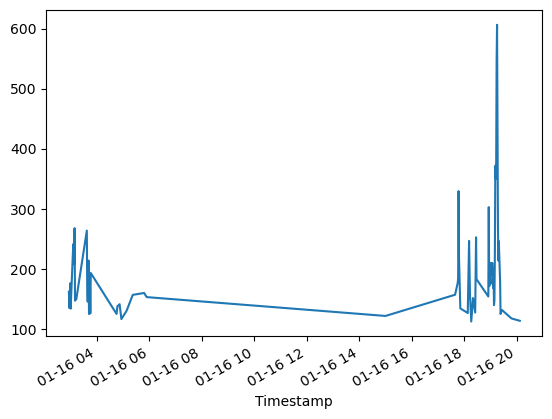

In [72]:
profit_per_trade_early.plot()

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [73]:
profit_per_trade_early.sum()

14147.169999999998

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [76]:
cumulative_profit_early = profit_per_trade_early.cumsum()

<AxesSubplot:xlabel='Timestamp'>

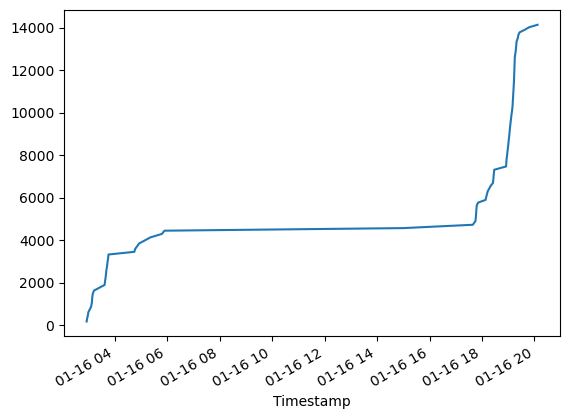

In [75]:
cumulative_profit_early.plot()

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** YOUR ANSWER HERE